In [2]:
import pandas as pd
import datetime
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from matplotlib import style 
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



# EDA

In [3]:
df = pd.read_csv('../datasets/segmentation_data.csv')

In [4]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [6]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [7]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [8]:
## Checking missing values
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [9]:
# checking nunique and type per columns:
df_nunique = pd.DataFrame([[col , df[col].nunique(),df[col].dtypes] for col in df.columns],columns=['col','nunique','type'])
df_nunique

,col,nunique,type
0,ID,2000,int64
1,Sex,2,int64
2,Marital status,2,int64
3,Age,58,int64
4,Education,4,int64
5,Income,1982,int64
6,Occupation,3,int64
7,Settlement size,3,int64


In [10]:
num_columns = ['ID','Age','Income']
cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']
df[cat_columns] = df[cat_columns].astype('str')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0


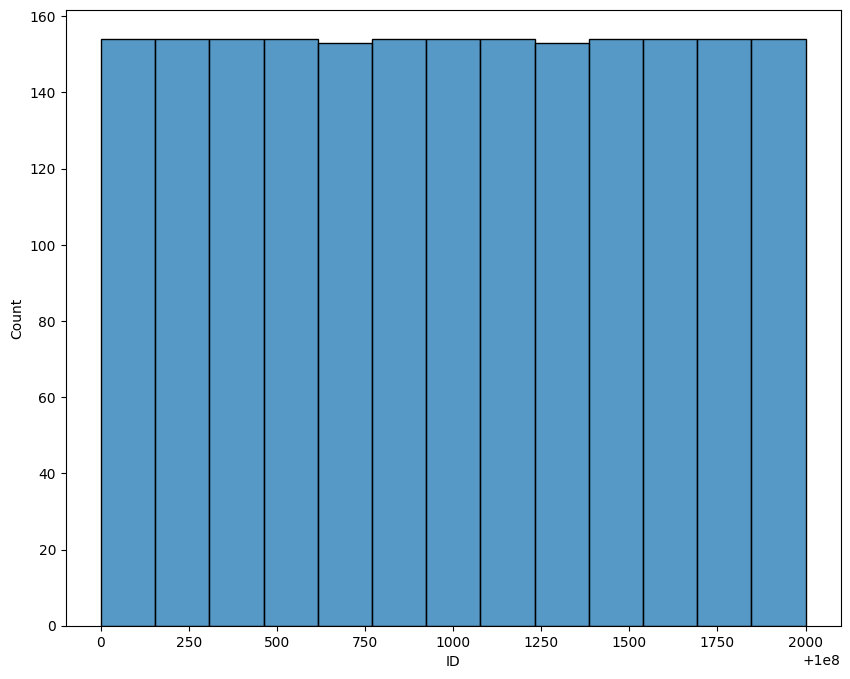

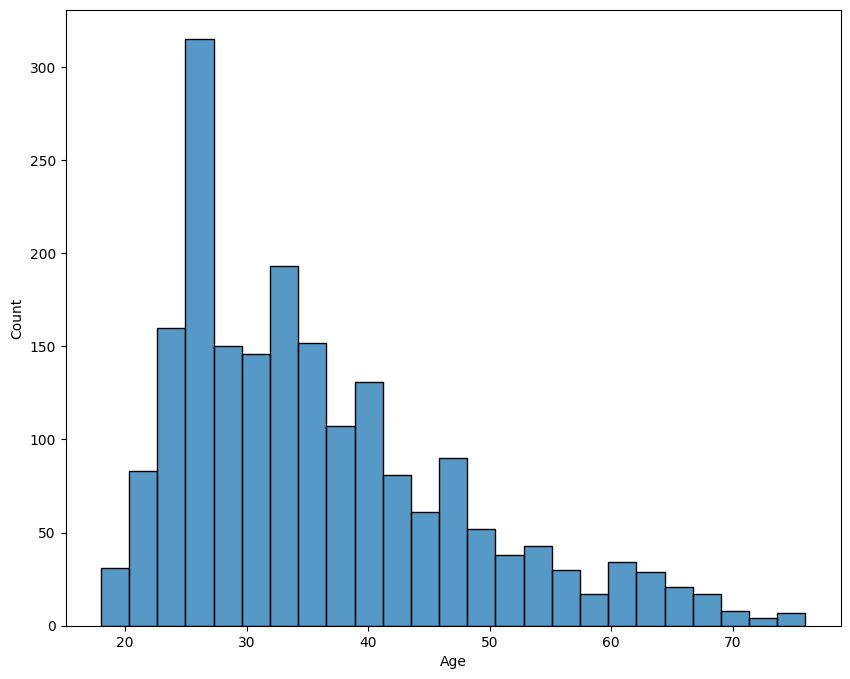

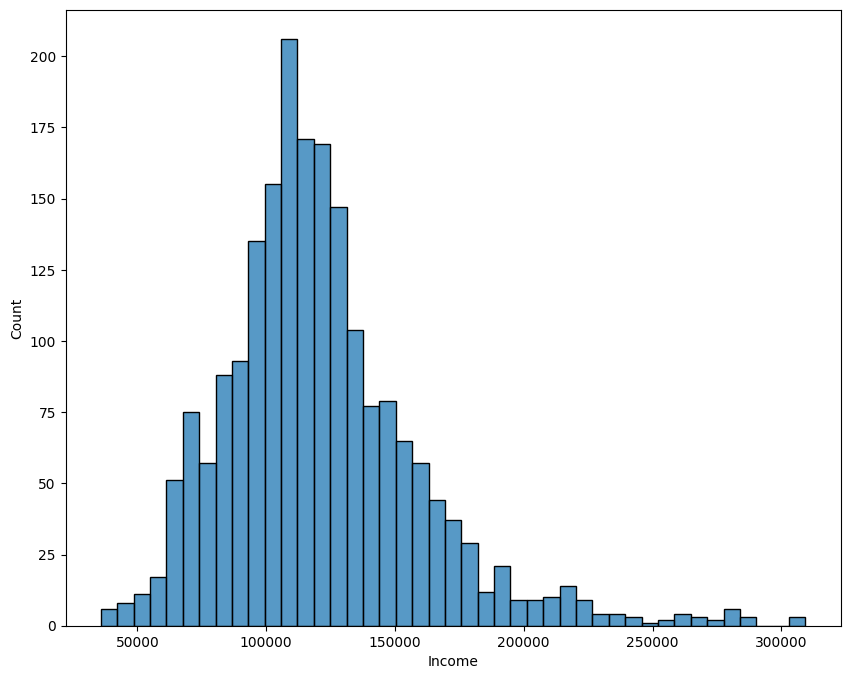

In [12]:
## Numerical variables distribution
for col in num_columns:
    plt.figure(figsize=(10,8))
    sns.histplot(data = df, x = col)

## Conclusions
1. Id has a uniform distribution (isn't an important variable)
2. The variable 'Age' has a heavy right skew, generated because of the lower limit at zero of the variable. If we are using K-Means clustering, there will be no need to normalize the feature, but we may have to do so for other models.
3. The feature 'Income' has the same right skew problem as the 'Age' feature. We'll have to be wary of this depending on the model we select.

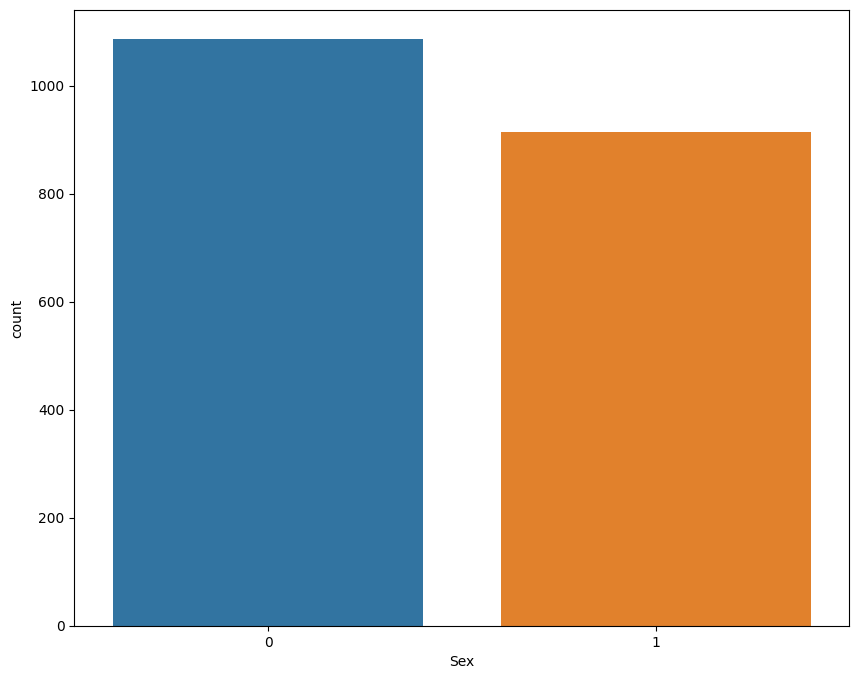

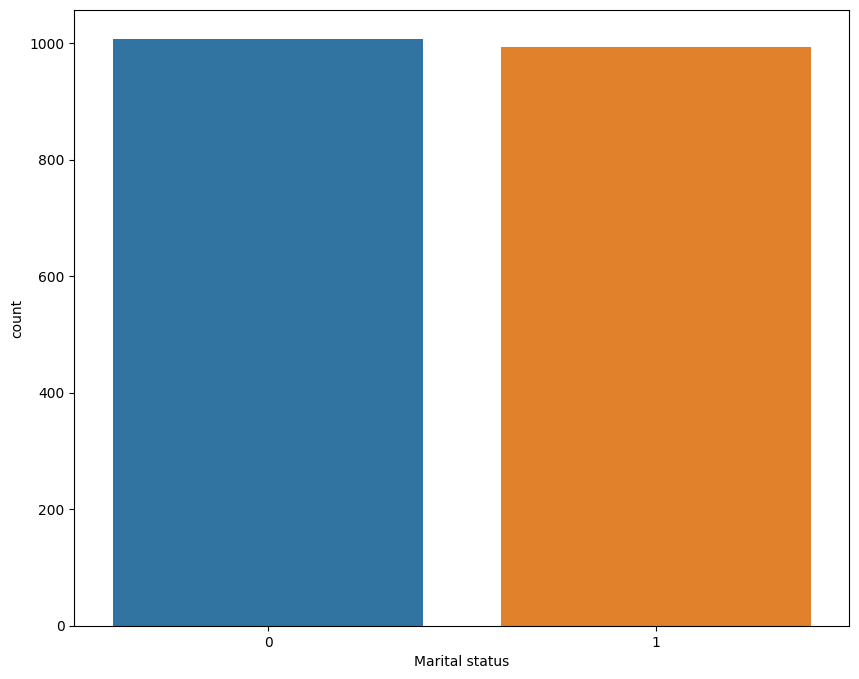

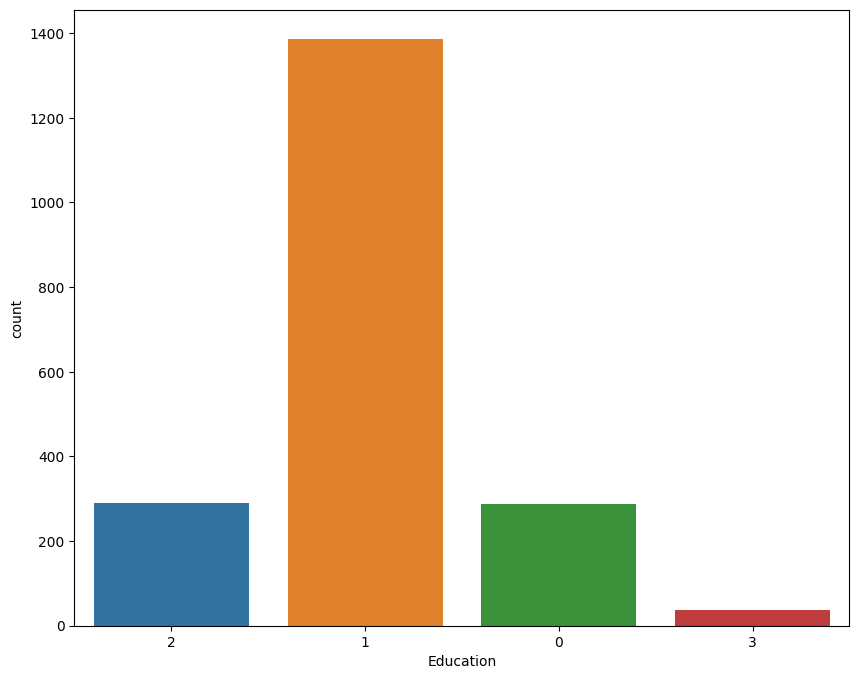

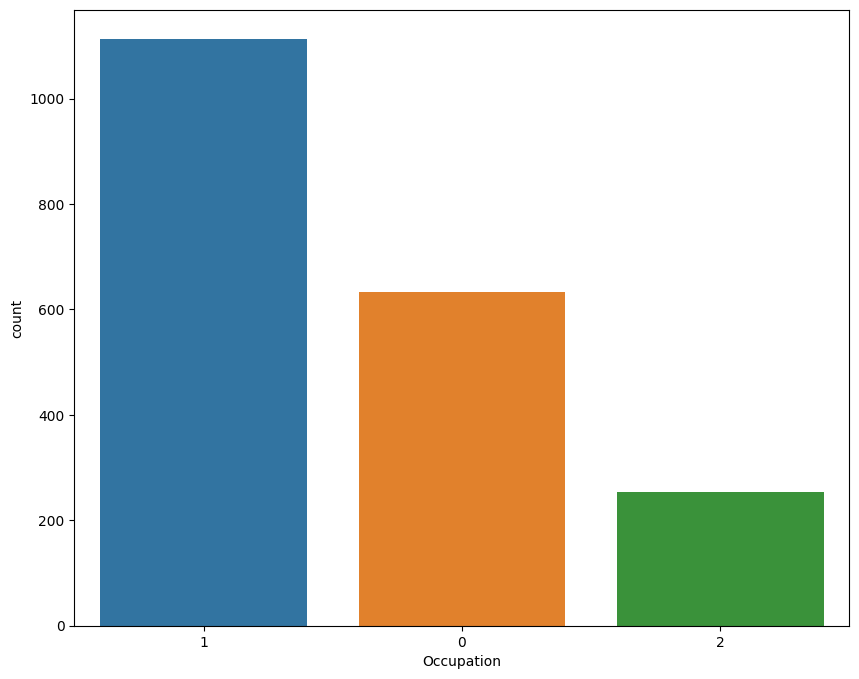

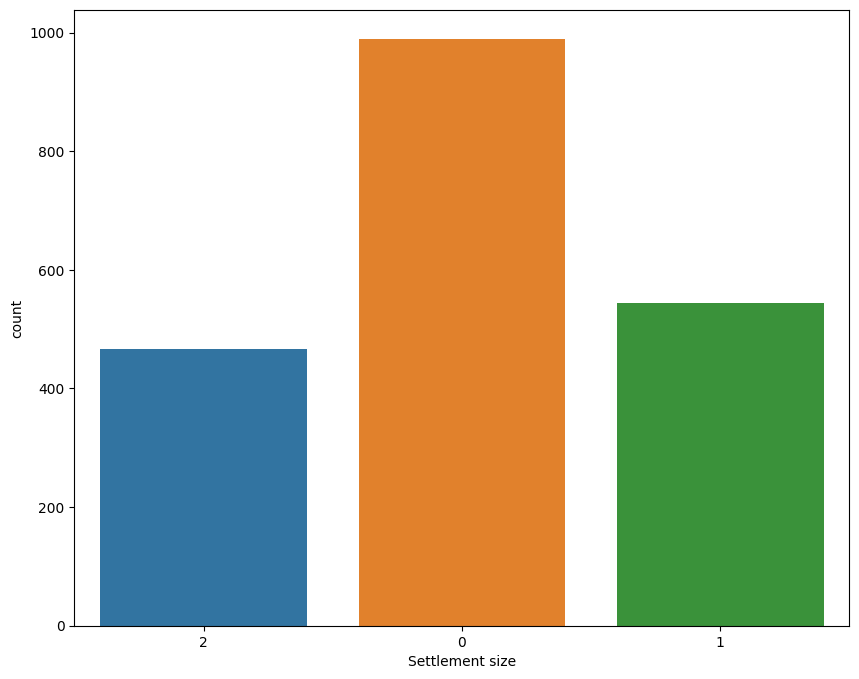

In [13]:
## Categorical variables distribution
for col in cat_columns:
    plt.figure(figsize=(10,8))
    sns.countplot(data = df, x=col)

## Conclusions
-   Customer genders are quite balanced.
-   Marital status is also balanced.
-   Most customers have highschool level education. There are only 1,8% graduate students. We could join both categories ('2' and '3') in a category called university & over.
-   Both the 'Occupation' and 'Settlement size' features seem to have a larger enough quantity of instances of each category.

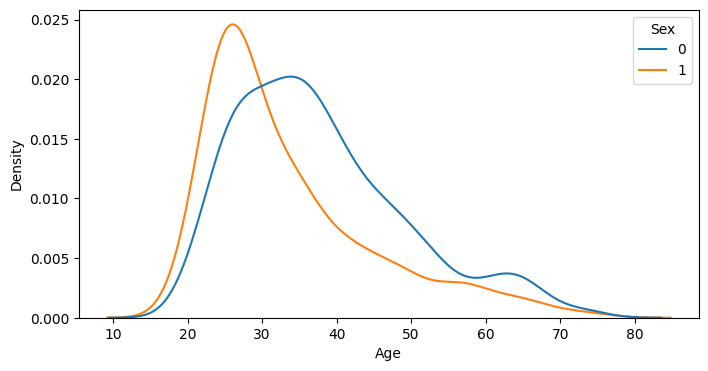

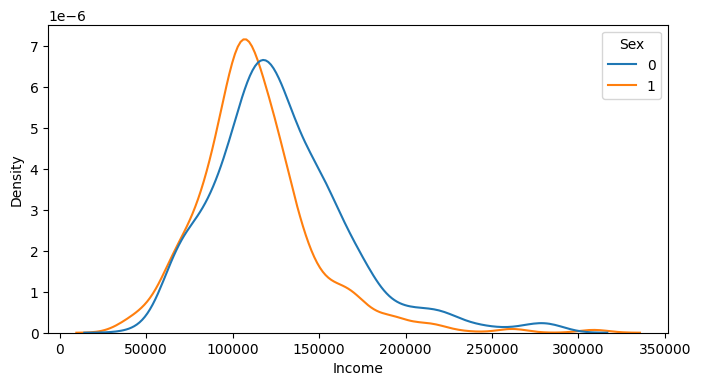

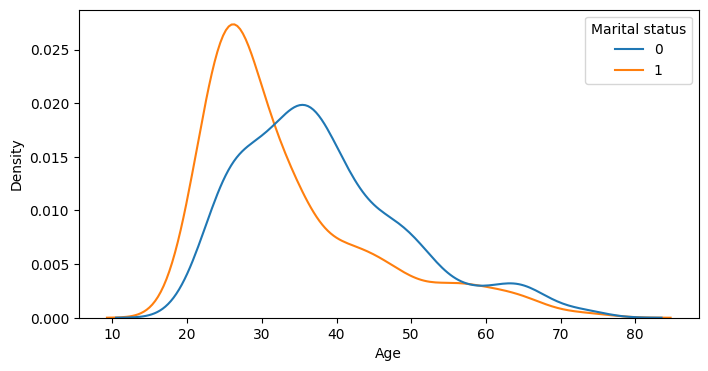

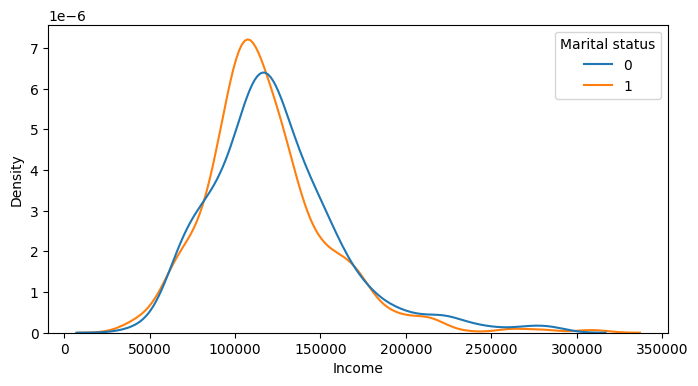

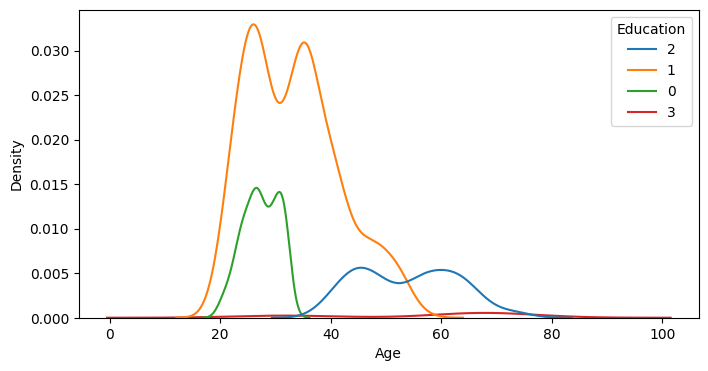

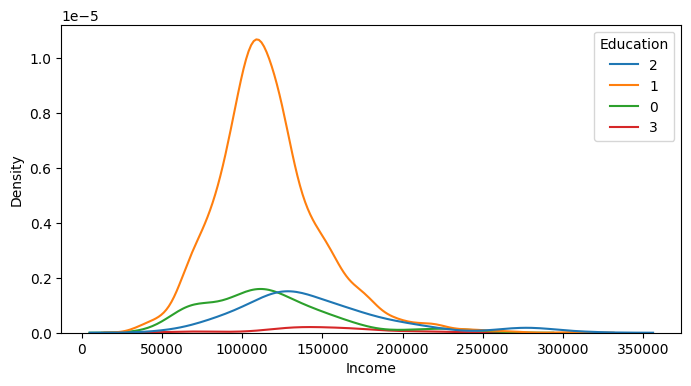

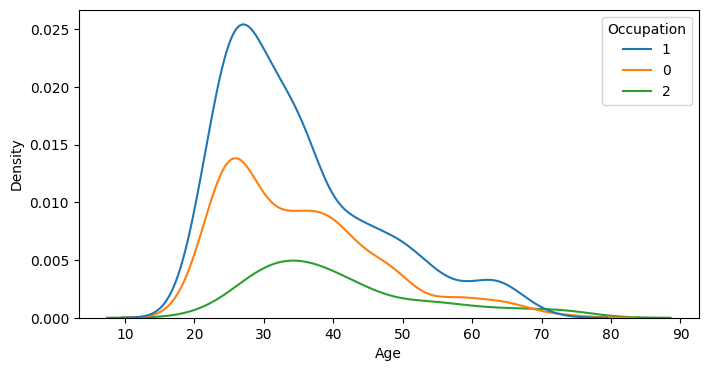

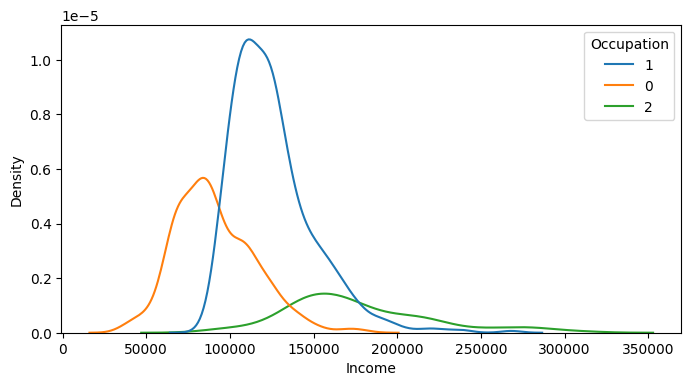

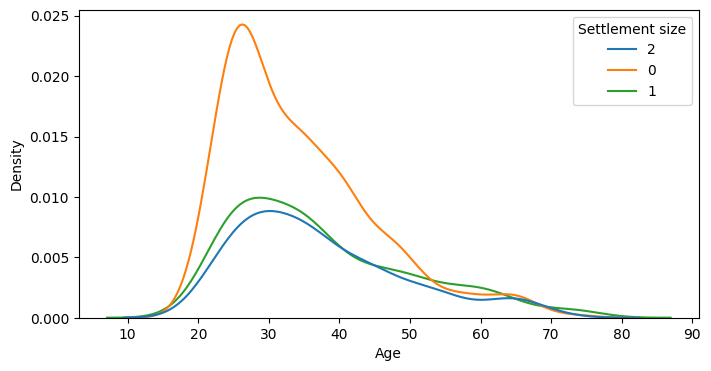

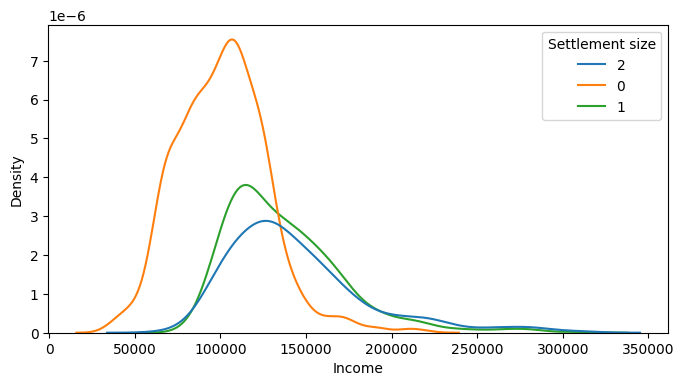

In [14]:
## Categorical vs Numerical
for col_cat in cat_columns:
    for col_num in num_columns:
        if col_num != 'ID':
            plt.figure(figsize=(8,4))
            sns.kdeplot(data=df, x=col_num, hue=col_cat)

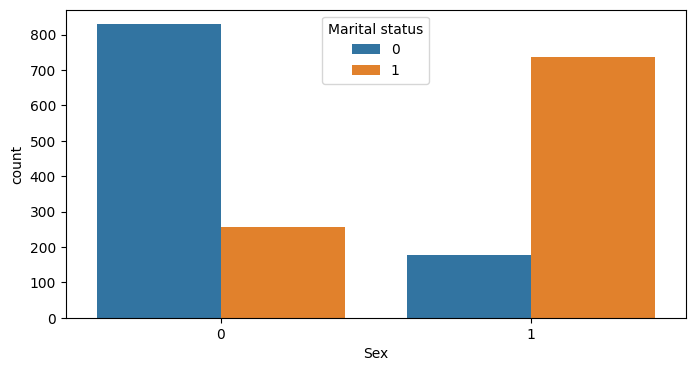

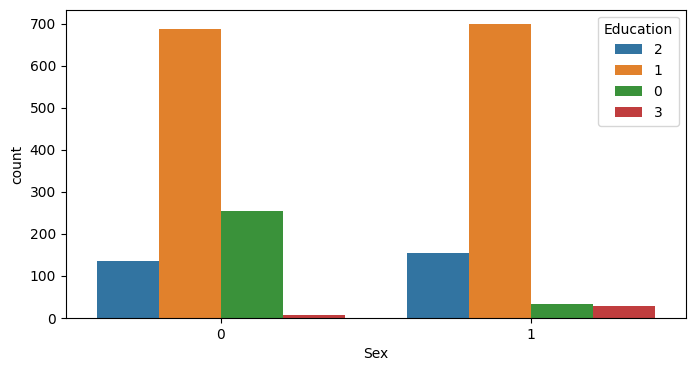

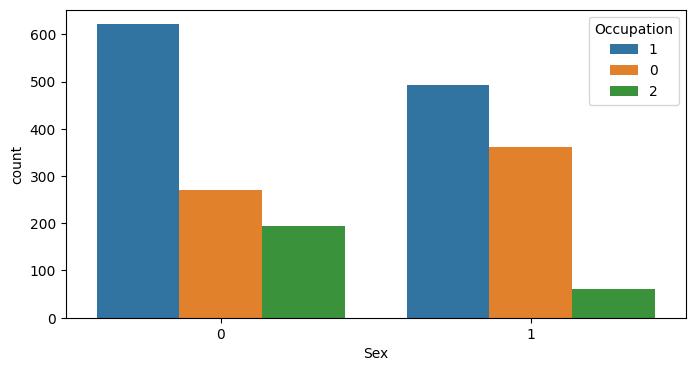

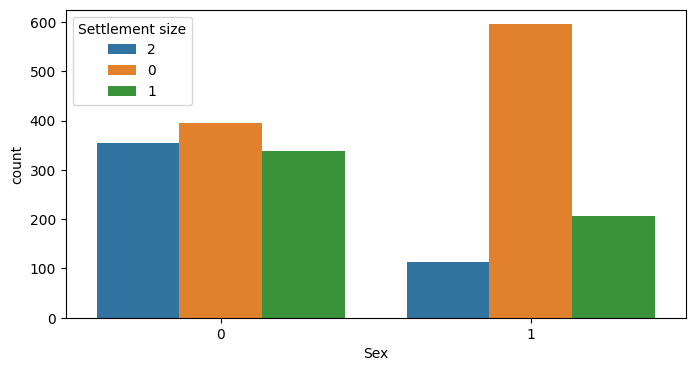

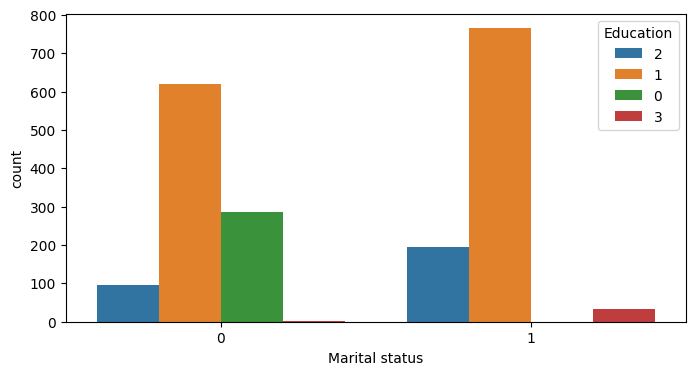

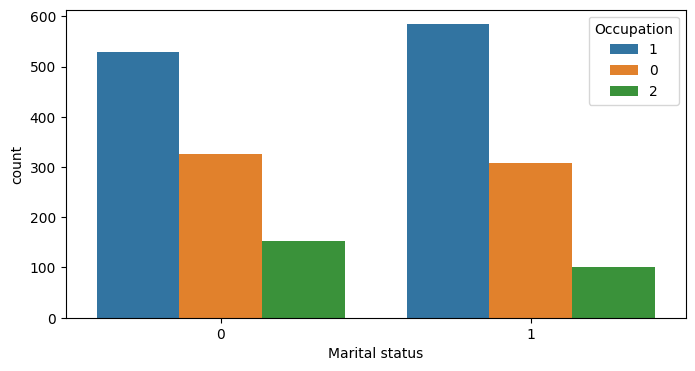

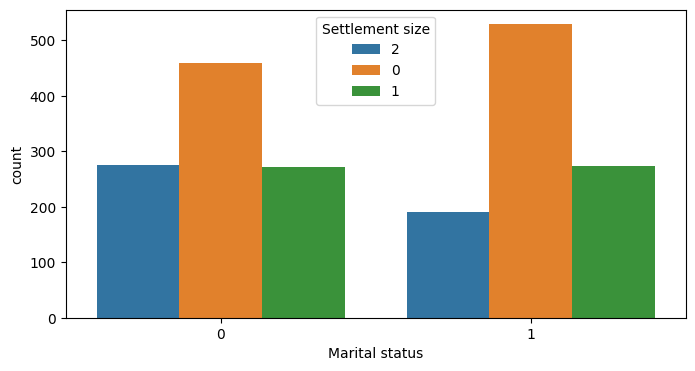

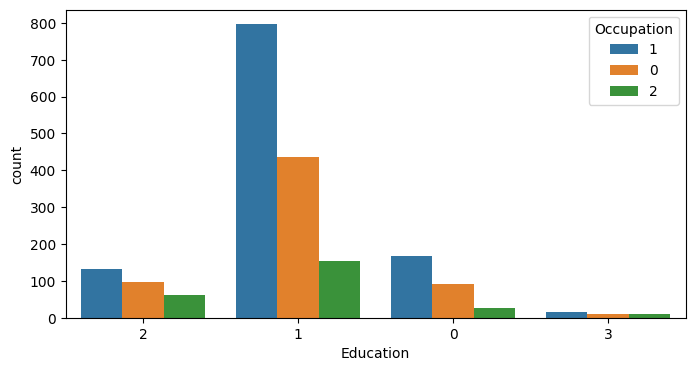

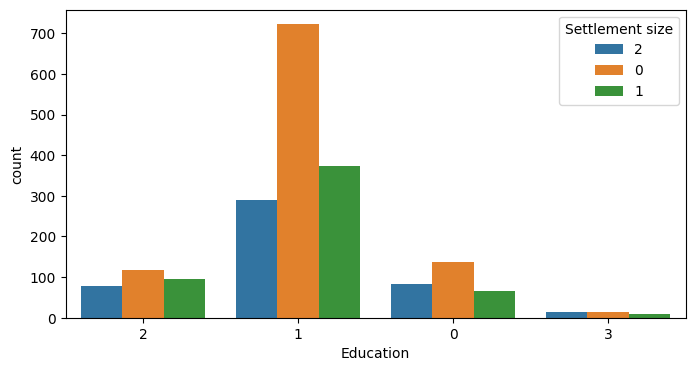

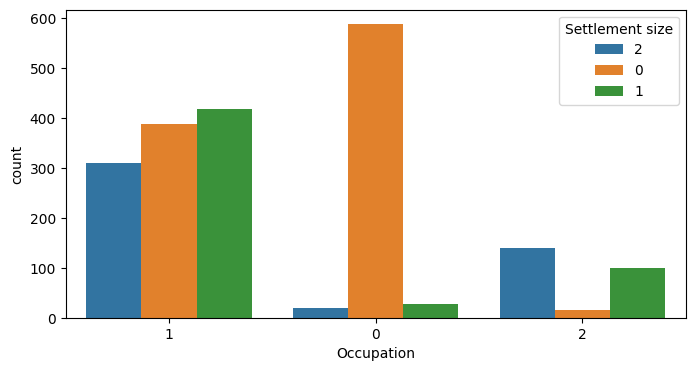

In [15]:
## Categorical vs Categorical
cat_columns_C = cat_columns.copy()
for C1 in cat_columns:
    cat_columns_C.pop(0);
    for C2 in cat_columns_C:
        if C1 != C2:
            plt.figure(figsize=(8,4))
            sns.countplot(data=df, x=C1, hue=C2)

There are a few interesting relationships that can be drawn from the data:

1) People with Occupation = '0' (unemployed) tend to live in small cities within the customers.

2) Married people tend to have either highschool-level or post-graduate-level educations within the customers.

3) Married people also tend to live in smaller cities.

4) Women within the customer list tend to be married more often than men.

5) Males tend to be employed more often within the customer list. Women within the dataset, on the other hand, tend to be unemployed more often

## Feature transformation and scaling

Age and Income feature have a right-skewed normal distribution. We will have to correct that for the model to perform correctly, since it assumes normality in our features. Most likely, a log transform will correct this skew.

In [16]:
# Normality test for the data by using a normality test from scipy
from scipy.stats.mstats import normaltest

print('The p-value for the null hypothesis of the Age being Normally distributed is: {}'
     .format(normaltest(df.Age)[1]))
print('The p-value for the null hypothesis of the Income being Normally distributed is: {}'
     .format(normaltest(df.Income)[1]))

##The p-value for both features is extremely low and we need to transform the data and check for normallity against the transformed data to add it to the model

The p-value for the null hypothesis of the Age being Normally distributed is: 3.3428344869999675e-56
The p-value for the null hypothesis of the Income being Normally distributed is: 2.5009638879187734e-98


In [17]:
# Perform Log Transformation:
df['log_Age'] = np.log1p(df.Age)
df['log_Income'] = np.log1p(df.Income)

# Drop Age & Income columns:
df.drop(['Age','Income'], axis=1,inplace=True)

In [18]:
print('The p-value for the null hypothesis of the Age being Normally distributed is: {}'
     .format(normaltest(df.log_Age)[1]))
print('The p-value for the null hypothesis of the Income being Normally distributed is: {}'
     .format(normaltest(df.log_Income)[1]))

The p-value for the null hypothesis of the Age being Normally distributed is: 8.294533638884815e-25
The p-value for the null hypothesis of the Income being Normally distributed is: 9.420130728049282e-08


<AxesSubplot:>

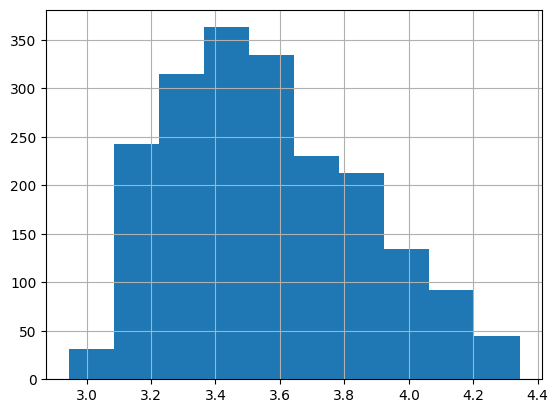

In [19]:
df.log_Age.hist()

<AxesSubplot:>

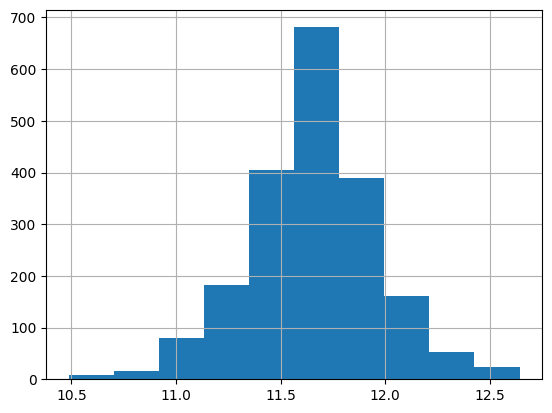

In [20]:
df.log_Income.hist()

In [21]:
## Drop Id column
df.drop('ID', axis=1, inplace=True)

In [22]:
## Feature Scaling with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df)

In [27]:
X = pd.DataFrame(X, columns=df.columns)

## Mean-shift Clustering
MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

The algorithm automatically sets the number of clusters, instead of relying on a parameter bandwidth, which dictates the size of the region to search through. This parameter can be set manually, but can be estimated using the provided estimate_bandwidth function, which is called if the bandwidth is not set.

In [28]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile = 0.1)


In [29]:
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X)

X['labels'] = ms.labels_


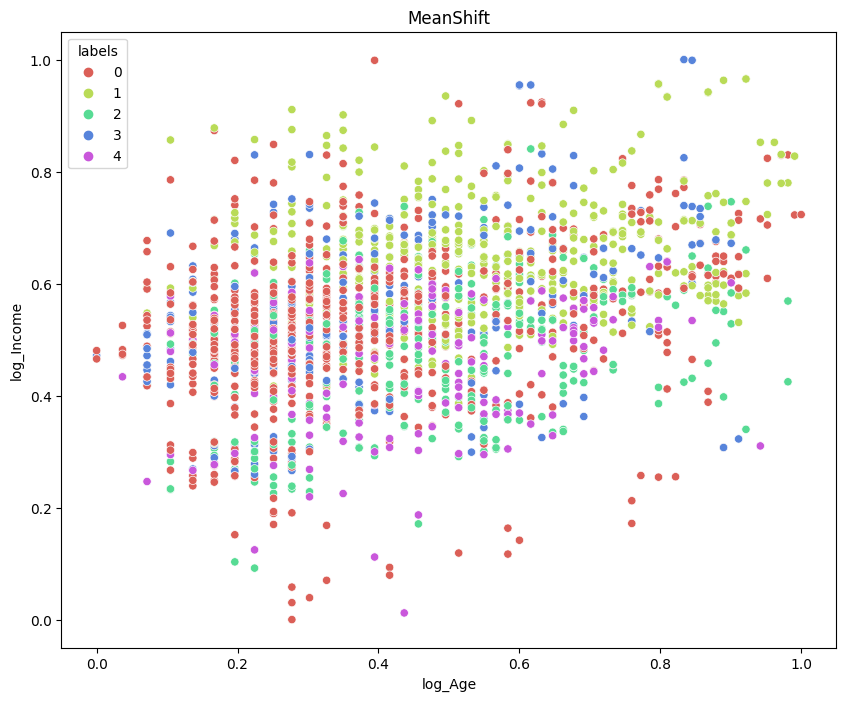

In [30]:
plt.figure(figsize=(10,8))
sns.scatterplot(X['log_Age'], X['log_Income'],hue=X['labels'], palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.title('MeanShift')
plt.show()
## It looks like Meanshift only found 5 clusters.

In [31]:
## Silhouette Score
print('Silhouette Score: {}'.format(silhouette_score(X, ms.labels_)))

Silhouette Score: 0.6125539015618255
